# To conceretly show the phase transition for the XY data correlation matrix by the discontinuity of the derivatives of Eigenvalues

In [4]:
import sys
import os
sys.path.append('Jerome_scripts_Original/PGM/')
sys.path.append('selfPackages/')
sys.path.append('Jerome_scripts_Original/')
sys.path.append('ffmpeg-3.4.2-32bit-static/')

import numpy as np
import scipy as sc
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

try:
    import rbm
    import bm
except:
    print 'Compiling cy_utilities first'
    curr_dir = os.getcwd()
    os.chdir('PGM/')
    !python setup.py build_ext --inplace
    print 'Compilation done'
    os.chdir(curr_dir)
    
import pickle
from ising import IsingModel
import estimate_correlations_ising
from sklearn.utils import shuffle
import inlineMovies
import XYutilities

In [500]:
#import dill
#dill.dump_session('./data_bruckner/data/notebookData/35_XYmodel_1D_PT_EV_EVec)

In [2]:
#import dill
#dill.load_session('./data_bruckner/data/notebookData/35_XYmodel_1D_PT_EV_EVec')

In [6]:
size = 100
N = size
num_hidden = 1
beta = np.arange(0.1,2.1,0.2)
Num_configs = 25000

In [ ]:
popt = np.zeros([len(np.array(results['W'])[:,0,0,0]),RBM.n_h,len(np.array(results['W'])[-1,0,:,0]),3])
popc = np.zeros([len(np.array(results['W'])[:,0,0,0]),RBM.n_h,len(np.array(results['W'])[-1,0,:,0]),3,3])

for i in np.arange(len(np.array(results['W'])[-1,0,:,0])):
    for j in np.arange(len(np.array(results['W'])[:,0,0,0])):
        for k in np.arange(RBM.n_h):
            try:
                popt[j,k,i],popc[j,k,i] = sc.optimize.curve_fit(cosfit,np.arange(10),(np.array(results['W'])[j,k,i,:]),[1,1,2*np.pi/10],bounds=(0,[np.inf,2*np.pi,np.inf]))
            except:
                pass
            

In [ ]:
BM   = []
data = []

for i in range(len(beta)):
    BM.append(bm.BM(N=N,nature='Potts',n_c=10))
    BM[i].layer.couplings = XYutilities.XY1dCouplings(BM[i],size = 100,beta=beta[i],num_states=10,PBC=True)
    data.append(BM[i].gen_data(Nchains=1,Nthermalize=0,Lchains=np.max(Num_configs),Nstep=200))

In [ ]:
cov_MATeval = np.zeros(len(Num_configs))

for i in range(len(Num_configs)):
    _,_,temp = (corXY(data[0:Num_configs[i],:],10,100))
    cov_MATeval[i] = np.max(temp)

covMAT     = []
covMATevec = []
covMATeval = []

for i in range(len(beta)):
    covMAT,covMATevec,covMATeval = corXY(data,10,100)

KeyboardInterrupt: 

In [1]:
plt.figure(figsize=(10,5))
plt.plot(covMATeval,'o')
plt.ylabel('Eigenvalue')
plt.xlabel('Eigenvalue Index')
plt.title('Eigenvalue of Correlation matrix of XY model, beta=1.5 with 100000 samples')

NameError: name 'plt' is not defined

### Plot the top Eigenvalue as a function of the number for samples to show the phase transitions:

In [11]:
Num_configs  = np.arange(50,10000,100)
#Num_configs = np.append(np.append(np.arange(100,1000,200),np.arange(1000,5000,500)),np.arange(5000,100000,5000))

In [ ]:
cov_MATeval = np.zeros(len(Num_configs))

for i in range(len(Num_configs)):
    _,_,temp = (corXY(data[0:Num_configs[i],:],10,100))
    cov_MATeval[i] = np.max(temp)

/users/harsh/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """


In [117]:
cov_MATeval_tot = np.append(np.append(cov_MATeval[:],cov_MATeval2),cov_MATeval3[:])
Num_configs_tot = np.append(np.append(Num_configs[:],Num_configs2),Num_configs3[:])

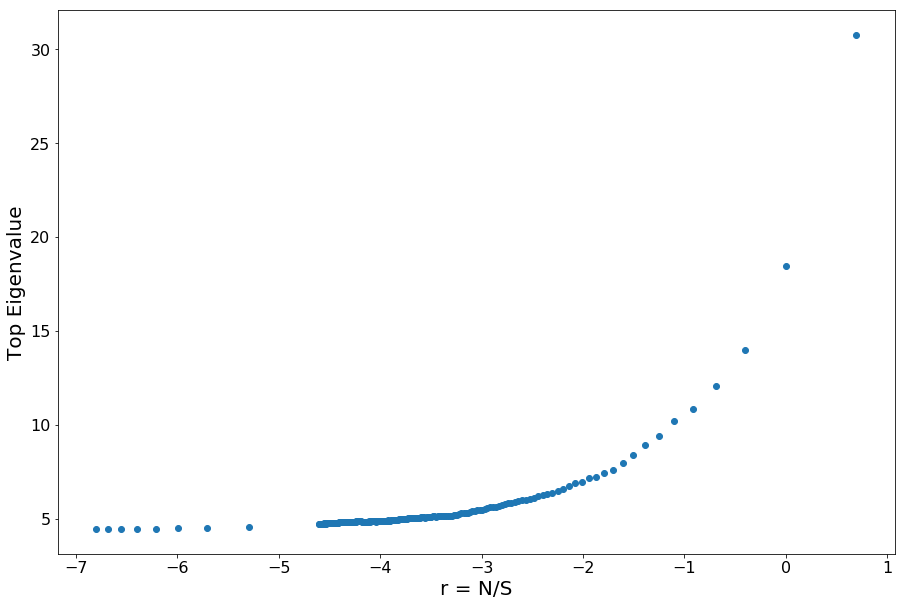

In [132]:
plt.figure(figsize=(15,10))
plt.scatter(np.log(100./x),y,marker='o')
#plt.plot(100./Num_configs[3:],(cov_MATeval[3]*(1+(1000./Num_configs[3:])**0.5)**2)/((1+(1000./Num_configs[3])**0.5)**2))
#plt.plot(100./Num_configs[3:],(10**0.5)*(1+(100./Num_configs[3:])**0.5)**2)
plt.ylabel('Top Eigenvalue',fontsize=20)
plt.xlabel('r = N/S',fontsize=20)
plt.tick_params(labelsize=16)

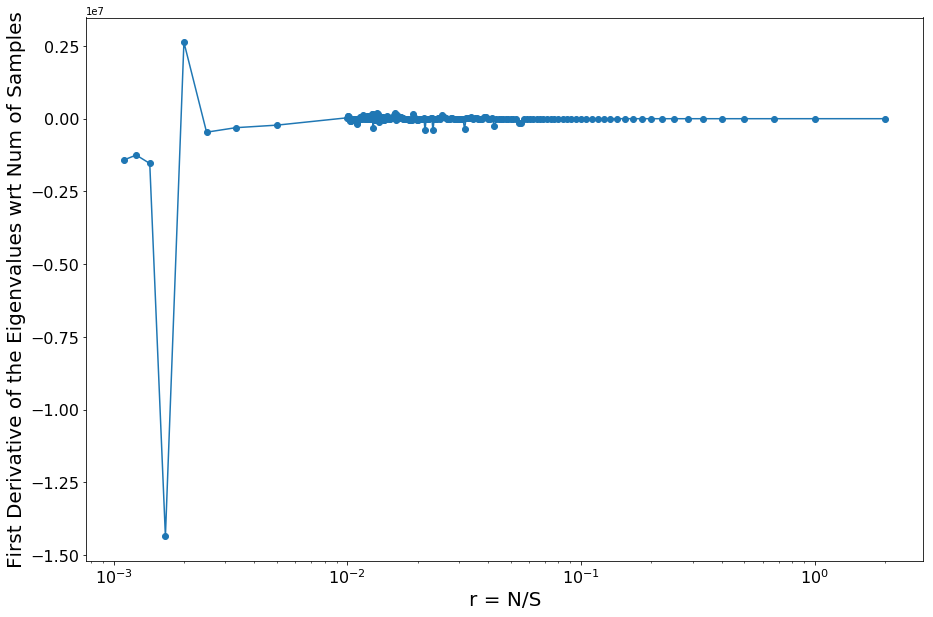

In [130]:
plt.figure(figsize=(15,10))
plt.plot((100./x),(np.gradient(x,y)),'o-')
plt.ylabel('First Derivative of the Eigenvalues wrt Num of Samples',fontsize=20)
plt.xlabel('r = N/S',fontsize=20)
plt.tick_params(labelsize=16)
plt.xscale('log')
#plt.xlim(0,0.4)

(0, 0.4)

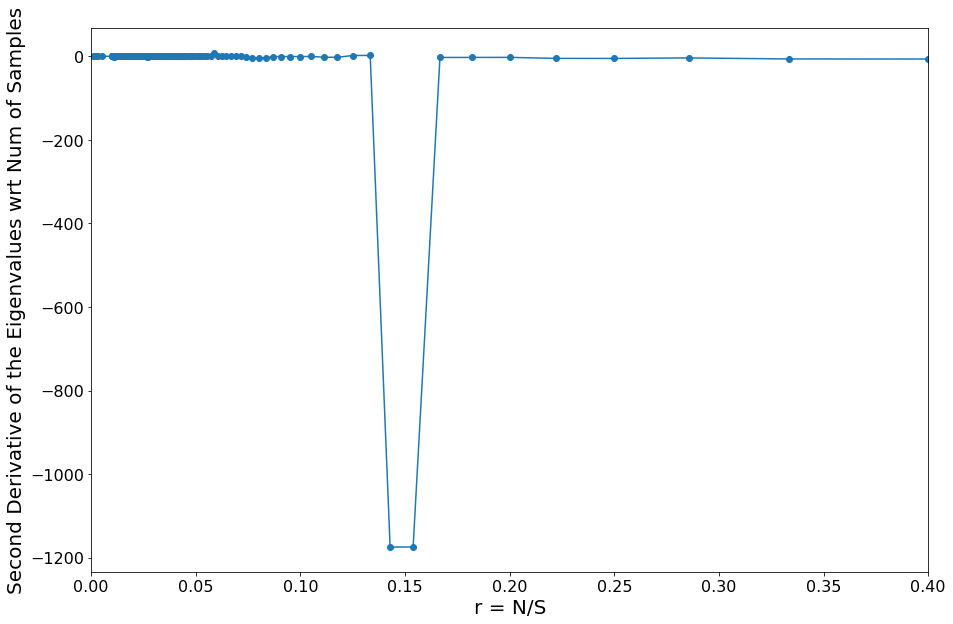

In [127]:
plt.figure(figsize=(15,10))
plt.plot((100./x),((np.gradient(x,np.gradient(x,y)))),'o-')
plt.ylabel('Second Derivative of the Eigenvalues wrt Num of Samples',fontsize=20)
plt.xlabel('r = N/S',fontsize=20)
plt.tick_params(labelsize=16)
#plt.xscale('log')
plt.xlim(0,0.4)

In [118]:
from scipy.interpolate import UnivariateSpline
y = cov_MATeval_tot[np.argsort(Num_configs_tot)]
x = np.sort(Num_configs_tot)
#y_spl = UnivariateSpline(x,y,k=4)

#plt.loglog(x,y,'ro',label = 'data')
#x_range = np.linspace(x[0],x[-1],1000)
#plt.semilogy(x_range,y_spl(x_range),'-')

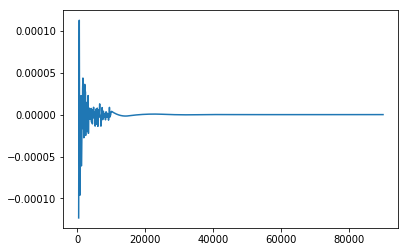

In [102]:
y_spl_2d = y_spl.derivative(n=2)

plt.plot(x_range,y_spl_2d(x_range))